# LP1 Data Analysis Project
## Indian Startup Data Analysis (2018-2021)

### 1. Business Understanding

The Indian startup data provides insights into the growth, funding patterns, success rates, employment impact, and challenges faced by startups in India. Analyzing this data helps identify emerging sectors, attractive regions, and investment trends. It also reveals opportunities to address societal and environmental challenges. Stakeholders can use this information for informed decision-making and support the thriving Indian startup ecosystem.

### Hypothesis

Null hypothesis: 
There is no relationship between the number of founders in a company compared to the amount of funding they receive

Alternate hypothesis:
 Companies with more than one founder receive more funding than those without

Question
    1. How much amount is needed for initial start-up?
    2. Which sector attracted the largest funding
    3. Which sector received the lowest amount of funding
    4. Who are the top 10 investors
    5. At what stage do startups get more funding from investors?
    6. What strategies does the startup have in place to connect with local artisans to build a global customer base?

### Loading Datasets

In [213]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling

import pandas as pd
import numpy as np

# Data Visualisation

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

In [214]:
data2021 = pd.read_csv('data_2021.csv')

In [215]:
data2021.head()

Company/Brand HeadQuarter          Sector   
0  Unbox Robotics   Bangalore              AI  \
1          upGrad      Mumbai          EdTech   
2     Lead School      Mumbai          EdTech   
3         Bizongo      Mumbai  B2B E-commerce   
4        FypMoney    Gurugram         FinTech   

                                        What_it_does   
0  Unbox Robotics builds on-demand AI-driven ware...  \
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                        Investor           Amount   
0                    BEENEXT, Entrepreneur First    $1,200,000.00  \
1       Unilazer Ventures, IIFL Asset Management  $120,000,000.00   
2               GSV Ventures, Westbridge Capital   $30,000,000.00   
3                         CDC Group, IDG Capital   $51,000,000.00   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000.00   

          Stage  
0  Pre-series A  
1           NaN  
2      Series D  
3      Series C  
4          Seed

In [216]:
data2020 = pd.read_csv('data_2020.csv')

In [217]:
data2020.head()

Company/Brand HeadQuarter              Sector   
0    Aqgromalin     Chennai            AgriTech  \
1      Krayonnz   Bangalore              EdTech   
2  PadCare Labs        Pune  Hygiene management   
3         NCOME   New Delhi              Escrow   
4    Gramophone      Indore            AgriTech   

                                        What_it_does   
0                       Cultivating Ideas for Profit  \
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                   Investor       Amount     Stage  
0           Angel investors  $200,000.00       NaN  
1           GSF Accelerator  $100,000.00  Pre-seed  
2            Venture Center         $nan  Pre-seed  
3         Venture Catalysts  $400,000.00       NaN  
4  Siana Capital Management  $340,000.00       NaN

In [218]:
data2019 = pd.read_csv('startup_funding2019.csv')

In [219]:
data2019

Company/Brand  Founded       Location   
0                 Bombay Shaving      NaN            NaN  \
1                      Ruangguru   2014.0         Mumbai   
2                       Eduisfun      NaN         Mumbai   
3                       HomeLane   2014.0        Chennai   
4                       Nu Genes   2004.0      Telangana   
5                       FlytBase      NaN           Pune   
6                          Finly      NaN      Bangalore   
7                       Kratikal   2013.0          Noida   
8                      Quantiphi      NaN            NaN   
9                       Lenskart   2010.0          Delhi   
10                    Cub McPaws   2010.0         Mumbai   
11                      Appnomic      NaN      Bangalore   
12                    Kaleidofin   2018.0        Chennai   
13                     JobSquare   2019.0      Ahmedabad   
14                   Open Secret      NaN            NaN   
15                        LivFin   2017.0          Delhi   
16                        Byju's   2011.0            NaN   
17                    Zest Money   2015.0      Bangalore   
18                       Witblox   2014.0            NaN   
19  Azah Personal Care Pvt. Ltd.   2018.0       Gurugram   
20                    SalaryFits   2015.0            NaN   
21                  Pristyn Care   2018.0            NaN   
22                   Springboard   2013.0            NaN   
23            DROR Labs Pvt. Ltd   2018.0          Delhi   
24                       Medlife   2014.0      Bangalore   
25                       Seekify   2019.0          Delhi   
26              Toffee Insurance   2017.0        Haryana   
27                 Fireflies .ai      NaN            NaN   
28                     HungerBox   2015.0      Bangalore   
29                         Bijak   2019.0            NaN   
30                       Licious      NaN      Bangalore   
31                         truMe      NaN            NaN   
32                      Pumpkart   2014.0     Chandigarh   
33             Asteria Aerospace   2011.0      Bangalore   
34                        Rivigo   2014.0            NaN   
35                   HappyEasyGo   2017.0       Gurugram   
36                       Zetwerk   2018.0      Bangalore   
37                    Observe.AI      NaN      Bangalore   
38                   Freshokartz   2016.0         Jaipur   
39  Lil’ Goodness and sCool meal      NaN      Bangalore   
40                         Trell   2016.0      Bangalore   
41                         VMate      NaN            NaN   
42          Bombay Shirt Company   2012.0         Mumbai   
43                       Slintel   2016.0            NaN   
44                    MyGameMate      NaN      Bangalore   
45                        Afinoz      NaN          Noida   
46                    Rein Games      NaN          Noida   
47                        Ecozen      NaN           Pune   
48                          Box8   2011.0         Mumbai   
49             Awign Enterprises   2016.0      Bangalore   
50                       Purplle   2012.0         Mumbai   
51                  Freightwalla   2017.0         Mumbai   
52                      TapChief   2016.0      Bangalore   
53                        eJOHRI   2015.0         Mumbai   
54                     Ninjacart   2015.0            NaN   
55                   Binca Games   2014.0         Mumbai   
56                         KredX      NaN      Bangalore   
57                       m.Paani      NaN         Mumbai   
58                         Origo   2010.0       Gurugram   
59                     WishADish      NaN          Delhi   
60                  Ecom Express   2012.0       Gurugram   
61                 Stanza Living   2017.0          Delhi   
62                        PiBeam      NaN        Chennai   
63                  Euler Motors      NaN          Delhi   
64                       Moms Co      NaN      New Delhi   
65                  Cubical Labs   2013.0            NaN   

In [220]:
data2018 = pd.read_csv('startup_funding2018.csv')

In [221]:
data2018

Company/Brand       Location                        Sector   
0                 Bombay Shaving            NaN                    E-commerce  \
1                      Ruangguru         Mumbai                        Edtech   
2                       Eduisfun         Mumbai                        Edtech   
3                       HomeLane        Chennai               Interior design   
4                       Nu Genes      Telangana                      AgriTech   
5                       FlytBase           Pune                    Technology   
6                          Finly      Bangalore                          SaaS   
7                       Kratikal          Noida                    Technology   
8                      Quantiphi            NaN                     AI & Tech   
9                       Lenskart          Delhi                    E-commerce   
10                    Cub McPaws         Mumbai               E-commerce & AR   
11                      Appnomic      Bangalore                          SaaS   
12                    Kaleidofin        Chennai                       Fintech   
13                     JobSquare      Ahmedabad                       HR tech   
14                   Open Secret            NaN                      Foodtech   
15                        LivFin          Delhi                       Fintech   
16                        Byju's            NaN                        Edtech   
17                    Zest Money      Bangalore                       Fintech   
18                       Witblox            NaN                        Edtech   
19  Azah Personal Care Pvt. Ltd.       Gurugram                        Health   
20                    SalaryFits            NaN                       Fintech   
21                  Pristyn Care            NaN                    Healthcare   
22                   Springboard            NaN                        Edtech   
23            DROR Labs Pvt. Ltd          Delhi                   Safety tech   
24                       Medlife      Bangalore                Pharmaceutical   
25                       Seekify          Delhi                          SaaS   
26              Toffee Insurance        Haryana          Insurance technology   
27                 Fireflies .ai            NaN                            AI   
28                     HungerBox      Bangalore                      Foodtech   
29                         Bijak            NaN                      AgriTech   
30                       Licious      Bangalore                          Food   
31                         truMe            NaN                           IoT   
32                      Pumpkart     Chandigarh                 E-marketplace   
33             Asteria Aerospace      Bangalore                 Robotics & AI   
34                        Rivigo            NaN                     Logistics   
35                   HappyEasyGo       Gurugram                        Travel   
36                       Zetwerk      Bangalore                 Manufacturing   
37                    Observe.AI      Bangalore                            AI   
38                   Freshokartz         Jaipur                 E-marketplace   
39  Lil’ Goodness and sCool meal      Bangalore              Food & Nutrition   
40                         Trell      Bangalore                  Social Media   
41                         VMate            NaN                           NaN   
42          Bombay Shirt Company         Mumbai                    E-commerce   
43                       Slintel            NaN                          SaaS   
44                    MyGameMate      Bangalore                      E-Sports   
45                        Afinoz          Noida                       Fintech   
46                    Rein Games          Noida                    Technology   
47                        Ecozen           Pune                      AgriTech   
48                          Box8         Mumbai   

# DATA CLEANING 

1. Check for missing values. Are there any rows or columns that are missing values? If so, you will need to decide how to handle them. You could delete the rows or columns, fill in the missing values with a default value, or impute the missing values using a statistical method.


2. Check for duplicate values. Are there any duplicate rows in the data? If so, you will need to decide how to handle them. You could delete the duplicates, keep one of the duplicates, or merge the duplicates into a single row.


3. Check for data errors. Are there any errors in the data, such as typos or inconsistent formatting? If so, you will need to correct the errors.


4. Clean up the data format. Is the data in the correct format? For example, are the dates in the correct format? If not, you will need to clean up the data format.


5. Validate the data. Once you have cleaned the data, you should validate it to make sure that it is accurate and consistent. You can do this by checking for outliers, verifying the data against known values, and running statistical tests.

##### CLEANING 2021 DATASET

In [222]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1190 non-null   object
 1   HeadQuarter    1185 non-null   object
 2   Sector         1190 non-null   object
 3   What_it_does   1190 non-null   object
 4   Investor       1129 non-null   object
 5   Amount         1190 non-null   object
 6   Stage          764 non-null    object
dtypes: object(7)
memory usage: 65.2+ KB


In [223]:
data2021.shape

(1190, 7)

In [224]:
data2021.describe()

Company/Brand HeadQuarter   Sector   
count           1190        1185     1190  \
unique          1033          64      207   
top         BharatPe   Bangalore  FinTech   
freq               8         421      121   

                                             What_it_does   
count                                                1190  \
unique                                               1143   
top     BharatPe develops a QR code-based payment app ...   
freq                                                    4   

                         Investor Amount Stage  
count                        1129   1190   764  
unique                        937    198    26  
top     Inflection Point Ventures   $nan  Seed  
freq                           23    147   241

In [225]:
data2021.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company/Brand      0
HeadQuarter        5
Sector             0
What_it_does       0
Investor          61
Amount             0
Stage            426
dtype: int64

In [226]:
missing_value = ['','N/a','NAN','na','nan']

# Read the data from the remote database
data_2021 = pd.read_csv('data_2021.csv')

# Check the number of missing values in each column
number_of_missing_values = data_2021.isnull().sum()

# Print the number of missing values in each column
number_of_missing_values


Company/Brand      0
HeadQuarter        5
Sector             0
What_it_does       0
Investor          61
Amount             0
Stage            426
dtype: int64

In [227]:
data2021.duplicated().sum()              #checking if there are duplicates


1

In [228]:
data2021.loc[data2021.duplicated(keep=False ), :]    #displaying the duplicated row

Company/Brand HeadQuarter   Sector   
332         Siply   Bangalore  FinTech  \
397         Siply   Bangalore  FinTech   

                                          What_it_does   
332  Siply Services operates as a micro-savings pla...  \
397  Siply Services operates as a micro-savings pla...   

                      Investor         Amount Stage  
332  Inflection Point Ventures  $1,000,000.00  Seed  
397  Inflection Point Ventures  $1,000,000.00  Seed

In [229]:
data2021 = data2021.drop_duplicates() #Droping duplicate rows
data2021.shape

(1189, 7)

In [230]:
data2021.columns          #checking columns names

Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Investor',
       'Amount', 'Stage'],
      dtype='object')

In [231]:
#changing column names
data2021.rename(columns={"Company_Brand": "Company/Brand"}, inplace=True)
data2021.rename(columns={"What_it_does": "What it does"}, inplace=True)
data2021.rename(columns={"HeadQuarter": "Location"}, inplace=True) 



In [232]:
data2021.columns          #checking columns names

Index(['Company/Brand', 'Location', 'Sector', 'What it does', 'Investor',
       'Amount', 'Stage'],
      dtype='object')

In [233]:
# Dropping unwanted columns

#data2021.drop(columns=['Founded','Founders'], inplace=True)
#data2021.columns

In [234]:
# Missing values in Amount Column

data2021[data2021['Amount'] == '—'].head()

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [235]:
# Replace Values

data2021['Amount'].replace("—", np.nan, inplace = True, regex=True)
data2021['Amount'].replace("[,$]", "", inplace = True, regex=True)

In [236]:
# Replace 0 values with np.nan in the converted rupee values
data2021['Amount'] = data2021['Amount'].replace(0, np.nan)

# Fill nan values in USD amount column with values in Amount column
data2021['Amount'] = data2021['Amount'].fillna(data2021['Amount'])



In [237]:
data2021.columns

Index(['Company/Brand', 'Location', 'Sector', 'What it does', 'Investor',
       'Amount', 'Stage'],
      dtype='object')

In [238]:

def replace_strings(data2021):
  """Replaces strings in the Amount column with NaNs.

  Args:
    data2021: The DataFrame to be modified.

  Returns:
    A modified DataFrame.
  """

  data2021['Amount'].replace('ah! Ventures', np.NAN, inplace=True)
  data2021['Amount'].replace('JITO Angel Network, LetsVenture', np.NAN, inplace=True)
  data2021['Amount'].replace('ITO Angel Network, LetsVenture', np.NAN, inplace=True)
  data2021['Amount'].replace('Pre-series A', np.NAN, inplace=True)
  data2021['Amount'].replace('$undisclosed', np.NAN, inplace=True)
  data2021['Amount'].replace('undisclosed', np.NAN, inplace=True)
  data2021['Amount'].replace('$Undisclosed', np.NAN, inplace=True)
  data2021['Amount'].replace('Upsparks', '1200000', inplace = True, regex=True)
  data2021['Amount'].replace('Undisclosed', np.NAN, inplace=True)
  data2021['Amount'].replace('Series C', np.NAN, inplace=True)
  data2021['Amount'].replace('Seed', np.NAN, inplace=True)
  data2021['Amount'].replace('$$100,00', 10000, inplace=True)

  return data2021

data2021 = replace_strings(data2021.copy())


In [239]:
# Missing values in Amount Column

data2021[data2021['Amount'] == '—'].head()

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [240]:
# Replace Values with np.nan

data2021['Amount'].replace("—", np.nan, inplace = True, regex=True)
data2021['Amount'].replace("[,$]", "", inplace = True, regex=True)
data2021['Amount'].replace("[,$J]", "", inplace = True, regex=True)


In [241]:
data2021["Amount"].replace("nan", np.nan, inplace = True, regex=True)

# Replace Values

data2021['Amount'].replace("[,$J]", "", inplace = True, regex=True)

In [242]:
# we want to simplify some of the values the HeadQuarter column
## Split values with a comma delimiter; select only the first element from the resulting list of substrings
## remove single quotes, since it is a string

data2021['Location'] = data2021['Location'].str.split(',').str[0].str.replace("'", "", regex=True)

In [243]:
# we want to simplify some of the values the HeadQuarter column
## Split values with a comma delimiter; select only the first element from the resulting list of substrings
## remove single quotes, since it is a string

data2021['Sector'] = data2021['Sector'].str.split(',').str[0].str.replace("'", "", regex=True)

In [244]:
#fixing some errors in column
#the code is replacing specific values in the Location column of the data2021 DataFrame with different values.

data2021['Location'].replace('Faridabad, Haryana','Faridabad',inplace =True)
data2021['Location'].replace('Mountain View, CA','California',inplace =True) 
data2021['Location'].replace('Online Media\t#REF!',np.nan,inplace =True)
data2021['Location'].replace('Information Technology & Services','Manchester',inplace =True)
data2021['Location'].replace('Small Towns, Andhra Pradesh','Andhra Pradesh',inplace =True)
data2021['Location'].replace('Computer Games',np.nan,inplace =True)
data2021['Location'].replace('Food & Beverages',np.nan,inplace =True)
data2021['Location'].replace('Pharmaceuticals\t#REF!',np.nan,inplace =True)
data2021['Location'].replace('Gurugram\t#REF!','Gurugram',inplace =True)

In [245]:
#fixing some errors in column
#the code is replacing specific values in the Sector column of the data2021 DataFrame with different values.

def fix_sector_names(data2021):
  """Replaces inconsistent sector names in the DataFrame.

  Args:
    data_df: The DataFrame to be modified.

  Returns:
    A modified DataFrame.
  """

  sector_name_mappings = {
      'AI company': 'AI',
      'AI startup': 'AI',
      'AR startup': 'AR',
      'Augmented reality': 'AR',
      'B2B Ecommerce': 'B2B E-commerce',
      'B2B marketplace': 'B2B Marketplace',
      'B2B startup': 'B2B',
      'Biotechnology': 'BioTechnology',
      'Blockchain startup': 'Blockchain',
      'Computer software': 'Computer Software',
      'Consumer goods': 'Consumer Goods',
      'Consumer service': 'Consumer Services',
      'Cryptocurrency': 'Crypto',
      'D2C Business': 'D2C',
      'D2C startup': 'D2C',
      'Deep Tech': 'Deeptech',
      'EV startup': 'EV',
      'Environmental service': 'Environmental Services',
      'Fashion and lifestyle': 'Fashion & Lifestyle',
      'Femtech': 'FemTech',
      'Food and Beverages': 'Food & Beverages',
      'HR Tech': 'HRTech',
      'Hauz Khas': 'Food & Beverages',
      'Healtcare': 'HealthCare',
      'Health care': 'HealthCare',
      'Health, Wellness & Fitness': 'Health',
      'Healthcare': 'HealthCare',
      'Heathcare': 'HealthCare',
      'Healthtech': 'HealthTech',
      'HeathTech': 'HealthTech',
      'IT company': 'IT',
      'IT startup': 'IT',
      'Information Technology': 'IT',
      'Innovation management': 'Innovation Management',
      'Insuretech': 'InsureTech',
      'Legaltech': 'LegalTech',
      'Manchester, Greater Manchester': 'Information Technology & Services',
      'Mechanical Or Industrial Engineering': 'Mechanical & Industrial Engineering',
      'MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.': 'EV',
      'Oil and Energy': 'Oil & Energy',
      'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.': 'HealthCare',
      'Real estate': 'Real Estate',
      'SaaS startup': 'SaaS',
      'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience': 'Online Media',
      'Social media': 'Social Media',
      'Software Startup': 'Software',
      'Software company': 'Software',
      'Sports startup': 'Sports',
      'Tech startup': 'Tech Startup',
      'Telecommuncation': 'Telecommunications',
      'sports': 'Sports',
  }

  data2021['Sector'].replace(sector_name_mappings, inplace=True)

  return data2021


data2021 = fix_sector_names(data2021.copy())


In [246]:
data2021['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan, 'Small Towns', 'Goa',
       'Rajsamand', 'Ranchi', 'Faridabad', 'Gujarat', 'Pune', 'Thane',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Kolkata',
       'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai', 'Ghaziabad',
       'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
       'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Roorkee',
       'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri',
       'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing',
       'Panaji', 'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View', 'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara',
       'Guwahati', 'Kochi', 'London', 'Manchester', 'The Nilgiris',
       'Gandhinagar'], dtype=object)

In [247]:
data2021['Sector'].unique()

array(['AI', 'EdTech', 'B2B E-commerce', 'FinTech', 'Home services',
       'HealthTech', 'Tech Startup', 'E-commerce', 'B2B service',
       'Helathcare', 'Renewable Energy', 'Electronics', 'IT',
       'Food & Beverages', 'Aeorspace', 'Deeptech', 'Dating', 'Gaming',
       'Robotics', 'Retail', 'Food', 'Oil & Energy', 'AgriTech',
       'Telecommunications', 'Milk startup', 'AI Chatbot', 'Logistics',
       'Hospitality', 'Fashion', 'Marketing', 'Transportation',
       'LegalTech', 'Food delivery', 'Automotive', 'SaaS',
       'Fantasy sports', 'Video communication', 'Social Media',
       'Skill development', 'Rental', 'Recruitment', 'HealthCare',
       'Sports', 'Computer Games', 'Consumer Goods', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'SportsTech', 'HRTech',
       'Wine & Spirits', 'Mechanical & Industrial Engineering',
       'Spiritual', 'Financial Services', 'Industrial Automation',
       'Health', 'Lifestyle', 'IoT', 'Banking', 'Computer Software',
       

In [248]:
data2021['Amount'].unique()

array(['1200000.00', '120000000.00', '30000000.00', '51000000.00',
       '2000000.00', '188000000.00', '200000.00', nan, '1000000.00',
       '3000000.00', '100000.00', '700000.00', '9000000.00',
       '40000000.00', '49000000.00', '400000.00', '300000.00',
       '25000000.00', '160000000.00', '150000.00', '1800000.00',
       '5000000.00', '850000.00', '53000000.00', '500000.00',
       '1100000.00', '6000000.00', '800000.00', '10000000.00',
       '21000000.00', '7500000.00', '26000000.00', '7400000.00',
       '1500000.00', '600000.00', '800000000.00', '17000000.00',
       '3500000.00', '15000000.00', '215000000.00', '2500000.00',
       '350000000.00', '5500000.00', '83000000.00', '110000000.00',
       '500000000.00', '65000000.00', '150000000000.00', '300000000.00',
       '2200000.00', '35000000.00', '140000000.00', '4000000.00',
       '13000000.00', '9500000.00', '8000000.00', '12000000.00',
       '1700000.00', '150000000.00', '100000000.00', '225000000.00',
       '67000

In [249]:
data2021[data2021['Amount']=='ITO Angel Network LetsVenture']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [250]:
# Replace individual rows in Amount column

data2021.at[551, 'Amount'] = '300000'
data2021.at[677, 'Amount'] = '1000000'

In [251]:
data2021[data2021['Amount']=='Pre-series A']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [252]:
data2021[data2021['Amount']=='Seed']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [253]:
data2021[data2021['Amount']=='Series C']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [254]:
data2021[data2021['Amount']=='Upsparks']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [255]:
data2021[data2021['Amount']=='ah! Ventures']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [256]:
data2021['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Pre-series',
       'Series A2', 'Series I'], dtype=object)

In [257]:
# Replace Values

data2021['Stage'].replace("[$]", "", inplace = True, regex=True)

In [258]:
data2021[data2021['Stage']=='1000000']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [259]:
data2021[data2021['Stage']=='1200000']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [260]:
data2021[data2021['Stage']=='300000']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [261]:
data2021[data2021['Stage']=='6000000']

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [262]:
# Replace Values to fix error

data2021['Stage'].replace('1000000', np.nan, inplace = True, regex=True)
data2021['Stage'].replace('1200000', np.nan, inplace = True, regex=True)
data2021['Stage'].replace('300000', np.nan, inplace = True, regex=True)
data2021['Stage'].replace('6000000', np.nan, inplace = True, regex=True)
data2021['Stage'].replace('Seies A', 'Series A', inplace = True, regex=True)

In [263]:
data2021['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Pre-series',
       'Series A2', 'Series I'], dtype=object)

## 2020 Data Cleaning

In [264]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1052 non-null   object
 1   HeadQuarter    958 non-null    object
 2   Sector         1039 non-null   object
 3   What_it_does   1052 non-null   object
 4   Investor       1014 non-null   object
 5   Amount         1052 non-null   object
 6   Stage          590 non-null    object
dtypes: object(7)
memory usage: 57.7+ KB


In [265]:
data2020.shape


(1052, 7)

In [266]:
data2020.describe()


Company/Brand HeadQuarter   Sector                      What_it_does   
count           1052         958     1039                              1052  \
unique           905          67      302                               990   
top           Zomato   Bangalore  Fintech  Provides online learning classes   
freq               6         317       80                                 4   

                 Investor Amount     Stage  
count                1014   1052       590  
unique                686    301        42  
top     Venture Catalysts   $nan  Series A  
freq                   28    253        96

In [267]:
data2020.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.


Company/Brand      0
HeadQuarter       94
Sector            13
What_it_does       0
Investor          38
Amount             0
Stage            462
dtype: int64

In [268]:
missing_value = ['','N/a','NAN','na','nan']  #define a list of values that will be considered as missing values in the data2021 DataFrame

# Read the data from the remote database
data_2021 = pd.read_csv('data_2021.csv')

# Check the number of missing values in each column
number_of_missing_values = data2020.isnull().sum()

# Print the number of missing values in each column
number_of_missing_values

Company/Brand      0
HeadQuarter       94
Sector            13
What_it_does       0
Investor          38
Amount             0
Stage            462
dtype: int64

In [269]:
data2020.duplicated().sum()              #checking if there are duplicates


0

In [270]:
data2020.loc[data2020.duplicated(keep=False ), :]    #displaying the duplicated row


Empty DataFrame
Columns: [Company/Brand, HeadQuarter, Sector, What_it_does, Investor, Amount, Stage]
Index: []

In [271]:
data2020 = data2020.drop_duplicates() #Droping duplicate rows


In [272]:
data2020.shape

(1052, 7)

In [273]:
data2020.columns          #checking columns names


Index(['Company/Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Investor',
       'Amount', 'Stage'],
      dtype='object')

In [274]:
#changing column name
data2020.rename(columns={"Company_Brand": "Company/Brand"}, inplace=True) 
data2020.rename(columns={"What_it_does": "What it does"}, inplace=True) 
data2020.rename(columns={"HeadQuarter": "Location"}, inplace=True) 


In [275]:
# Dropping unwanted columns

#data2020.drop(columns=['Founded','Founders','column10'], inplace=True)
#data2020.columns

In [276]:
data2020['Amount'].head()     


0    $200,000.00
1    $100,000.00
2           $nan
3    $400,000.00
4    $340,000.00
Name: Amount, dtype: object

In [277]:
data2020['Amount'].isnull().sum()   #checking null values in Amount


0

In [278]:
# Missing values in Amount Column

data2020[data2020['Amount'] == '—'].head()

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage]
Index: []

In [279]:
# Replace Values

data2020['Amount'].replace("—", np.nan, inplace = True, regex=True)
data2020['Amount'].replace("[,$]", "", inplace = True, regex=True)


In [280]:
data2020["Amount"].replace("nan", np.nan, inplace = True, regex=True)

In [281]:
def convert_and_format_amount(string):
    """
    Removes the dollar sign and commas from a string, converts it to a float, and formats it with commas.

    Args:
        string: The string to be converted.

    Returns:
        The formatted amount.
    """

    string = str(string)
    string = string.replace('$', '')
    string = string.replace(',', '')
    return f'${float(string):,.2f}'


data2020['Amount'] = data2020['Amount'].apply(convert_and_format_amount)

In [282]:
data2020['Amount'].unique()

array(['$200,000.00', '$100,000.00', '$nan', '$400,000.00', '$340,000.00',
       '$600,000.00', '$45,000,000.00', '$1,000,000.00', '$2,000,000.00',
       '$1,200,000.00', '$660,000,000.00', '$120,000.00', '$7,500,000.00',
       '$5,000,000.00', '$500,000.00', '$3,000,000.00', '$10,000,000.00',
       '$145,000,000.00', '$100,000,000.00', '$21,000,000.00',
       '$4,000,000.00', '$20,000,000.00', '$560,000.00', '$275,000.00',
       '$4,500,000.00', '$15,000,000.00', '$390,000,000.00',
       '$7,000,000.00', '$5,100,000.00', '$700,000,000.00',
       '$2,300,000.00', '$700,000.00', '$19,000,000.00', '$9,000,000.00',
       '$40,000,000.00', '$750,000.00', '$1,500,000.00', '$7,800,000.00',
       '$50,000,000.00', '$80,000,000.00', '$30,000,000.00',
       '$1,700,000.00', '$2,500,000.00', '$40,000.00', '$33,000,000.00',
       '$35,000,000.00', '$300,000.00', '$25,000,000.00', '$3,500,000.00',
       '$200,000,000.00', '$6,000,000.00', '$1,300,000.00',
       '$4,100,000.00', '$575

In [283]:
# we want to simplify some of the values the HeadQuarter column
## Split values with a comma delimiter; select only the first element from the resulting list of substrings
## remove single quotes, since it is a string

data2020['Location'] = data2020['Location'].str.split(',').str[0].str.replace("'", "", regex=True)

In [284]:
data2020['Location'].replace('Hyderebad','Hyderabad',inplace =True)
data2020['Location'].replace('San Francisco Bay Area',
                                    'San Francisco',inplace =True)
data2020['Location'].replace('San Franciscao','San Francisco',inplace =True)
data2020['Location'].replace('Banglore','Bangalore',inplace =True)
data2020['Location'].replace('Hyderebad','Hyderabad',inplace =True)

In [285]:
# we want to simplify some of the values the Sector column
## Split values with a comma delimiter; select only the first element from the resulting list of substrings
## remove single quotes, since it is a string

data2020['Sector'] = data2020['Sector'].str.split(',').str[0].str.replace("'", "", regex=True)
data2020['Investor'] = data2020['Investor'].str.split(',').str[0].str.replace("'", "", regex=True)

In [286]:
data2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [287]:
data2020['Stage'].unique()

array([nan, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [288]:
data2020['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts', 'Siana Capital Management', 'ICICI Bank.',
       'HostelFund', 'KB Investment', 'Shantanu Deshpande',
       'Fireside Ventures', 'Axilor Ventures',
       'Acumen Funds angel programme', 'Sequoia Capital India',
       'Rebel Foods', 'Kora', '100X VC', 'Bertelsmann India Investments',
       'Mastercard', 'BlackSoil', 'Jindal Steels', nan, 'Zenith Global',
       'Unitus Ventures', 'Coinbase Ventures',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital', 'Quona Capital', 'Swastika', 'Flipkart',
       'Delhi Private School', 'Malpani Ventures', 'Survam Partners',
       'Whiteboard Capital', 'Sequoia Capital.', 'Blacksoil',
       'Bridgestone India', 'BEENEXT', 'A91 Partners', 'Sequoia Capital',
       'NIIF Ltd', 'PayU Finance India', 'STEMROBO Technologies',
       'Infrastructure Leasing & Financial Services Limited',
       'The CoWrks Foundry', 'Y 

In [289]:
# Remove empty strings from the 'Amount' column
data2021['Amount'].replace('', np.nan, inplace=True)

# Convert the 'Amount' column to float and add the dollar sign back
data2021['Amount'] = data2021['Amount'].str.replace(',', '').str.replace('\$', '').astype(float)
data2021['Amount'] = data2021['Amount'].apply(lambda x: '${:,.2f}'.format(x))


## Adding Column to Data

In [290]:
# add year column

data2021['Year']=2021
data2020['Year']=2020

In [291]:
data2021


Company/Brand            Location   
0                      Unbox Robotics           Bangalore  \
1                              upGrad              Mumbai   
2                         Lead School              Mumbai   
3                             Bizongo              Mumbai   
4                            FypMoney            Gurugram   
5                       Urban Company           New Delhi   
6                      Comofi Medtech           Bangalore   
7                         Qube Health              Mumbai   
8                            Vitra.ai           Bangalore   
9                              Taikee              Mumbai   
10                          Fitterfly              Mumbai   
11                          FreeStand           New Delhi   
12                       MyDentalPlan           Bangalore   
13                       Freyr Energy           Hyderabad   
14                          DealShare              Jaipur   
15                           Tessolve           Bangalore   
16                       Smart Joules           New Delhi   
17                               ORAI           Bangalore   
18                            ixamBee           New Delhi   
19                   CoinSwitch Kuber           Bangalore   
20                           Razorpay           Bangalore   
21                              Uable           Bangalore   
22                    ZFW Hospitality           New Delhi   
23              Optimized Electrotech           Ahmadabad   
24                       Northern Arc             Chennai   
25                              Chara           Bangalore   
26                     Sirona Hygiene           New Delhi   
27                       Pristyn Care            Gurugram   
28                         TrulyMadly           New Delhi   
29                           Vidyakul                 NaN   
30                       Jambox Games           Bangalore   
31                               Miko              Mumbai   
32                             SuperK         Small Towns   
33                         TagZ Foods           Bangalore   
34                         Fuel Buddy           New Delhi   
35                          M1xchange            Gurugram   
36                            Spintly                 Goa   
37                         EF Polymer           Rajsamand   
38                               boAt           New Delhi   
39                           TruNativ              Mumbai   
40                               iBus           Bangalore   
41                       Puresh Daily              Ranchi   
42                          LearnVern           Ahmadabad   
43                           LimeChat           Faridabad   
44                               Dybo           Bangalore   
45                            moEVing            Gurugram   
46                       WeWork India           Bangalore   
47                        Solethreads            Gurugram   
48                            Beldara              Mumbai   
49                           CredFlow           New Delhi   
50                       Do Your Thng            Gurugram   
51                       Oye Rickshaw            Gurugram   
52                         Legitquest           New Delhi   
53                             Swiggy           Bangalore   
54                             AntWak           Bangalore   
55                          PlayShifu           Bangalore   
56                            Pitstop           Bangalore   
57                        Lendingkart             Gujarat   
58                               CRED           Bangalore   
59                           Karnival           Bangalore   
60                          PharmEasy              Mumbai   
61                               WESS              Mumbai   
62                             ShopSe              Mumbai   
63                     Fantasy Akhada            Gurugram   
64                        Rage Coffee           New Delhi  

In [292]:
#Merge 2020 and 2021 Data

data_2020_2021 = pd.concat([data2021, data2020], ignore_index=True)
data_2020_2021

Company/Brand             Location   
0                            Unbox Robotics            Bangalore  \
1                                    upGrad               Mumbai   
2                               Lead School               Mumbai   
3                                   Bizongo               Mumbai   
4                                  FypMoney             Gurugram   
5                             Urban Company            New Delhi   
6                            Comofi Medtech            Bangalore   
7                               Qube Health               Mumbai   
8                                  Vitra.ai            Bangalore   
9                                    Taikee               Mumbai   
10                                Fitterfly               Mumbai   
11                                FreeStand            New Delhi   
12                             MyDentalPlan            Bangalore   
13                             Freyr Energy            Hyderabad   
14                                DealShare               Jaipur   
15                                 Tessolve            Bangalore   
16                             Smart Joules            New Delhi   
17                                     ORAI            Bangalore   
18                                  ixamBee            New Delhi   
19                         CoinSwitch Kuber            Bangalore   
20                                 Razorpay            Bangalore   
21                                    Uable            Bangalore   
22                          ZFW Hospitality            New Delhi   
23                    Optimized Electrotech            Ahmadabad   
24                             Northern Arc              Chennai   
25                                    Chara            Bangalore   
26                           Sirona Hygiene            New Delhi   
27                             Pristyn Care             Gurugram   
28                               TrulyMadly            New Delhi   
29                                 Vidyakul                  NaN   
30                             Jambox Games            Bangalore   
31                                     Miko               Mumbai   
32                                   SuperK          Small Towns   
33                               TagZ Foods            Bangalore   
34                               Fuel Buddy            New Delhi   
35                                M1xchange             Gurugram   
36                                  Spintly                  Goa   
37                               EF Polymer            Rajsamand   
38                                     boAt            New Delhi   
39                                 TruNativ               Mumbai   
40                                     iBus            Bangalore   
41                             Puresh Daily               Ranchi   
42                                LearnVern            Ahmadabad   
43                                 LimeChat            Faridabad   
44                                     Dybo            Bangalore   
45                                  moEVing             Gurugram   
46                             WeWork India            Bangalore   
47                              Solethreads             Gurugram   
48                                  Beldara               Mumbai   
49                                 CredFlow            New Delhi   
50                             Do Your Thng             Gurugram   
51                             Oye Rickshaw             Gurugram   
52                               Legitquest            New Delhi   
53                                   Swiggy            Bangalore   
54                                   AntWak            Bangalore   
55                                PlayShifu            Bangalore   
56                                  Pitstop            Bangalore   
57                              Lendingkart              Gujarat   
58                

## 2019 Data Cleaning

In [293]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   Location       70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [294]:
data2019.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company/Brand     0
Founded          29
Location         19
Sector            5
What it does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [295]:
data2019.shape            # Get the shape of the DataFrame by rows and columns


(89, 9)

In [296]:
# The `missing_value` list defines a list of strings that represent missing values.
# The `pd.read_csv()` function reads the data from the CSV file into a DataFrame, and the `na_values` argument specifies the list of missing values.
# The `isnull().sum()` method calculates the number of missing values in each column of the DataFrame.
# The `number_of_missing_values` variable stores the number of missing values in each column of the DataFrame.

missing_value = ['','N/a','NAN','na','nan']                   
data2019 = pd.read_csv('startup_funding2019.csv', na_values=missing_value)
data2019.isnull().sum()

Company/Brand     0
Founded          29
Location         19
Sector            5
What it does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [297]:
data2019.duplicated().sum()              #checking if there are duplicates


0

In [298]:
data2019.columns          #checking columns names

Index(['Company/Brand', 'Founded', 'Location', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [299]:
# Dropping unwanted columns

data2019.drop(columns=['Founded','Founders'], inplace=True)

In [300]:
#Renaming columns
data2019.rename(columns = {
                        'Amount($)':'Amount',
                        'HeadQuarter':'Location',
                        },
             inplace = True)

In [301]:
data2019.columns          #checking columns names

Index(['Company/Brand', 'Location', 'Sector', 'What it does', 'Investor',
       'Amount', 'Stage'],
      dtype='object')

In [302]:
data2019['Amount'].value_counts().head()

Amount
Undisclosed    12
$5,000,000      6
$1,500,000      4
$6,000,000      4
$1,000,000      4
Name: count, dtype: int64

In [303]:
# Replace Undisclosed values

data2019['Amount'].replace('Undisclosed', np.nan, inplace = True, regex=True)

In [304]:
data2019['Amount'].value_counts().head()

Amount
$5,000,000     6
$1,500,000     4
$6,000,000     4
$1,000,000     4
$30,000,000    3
Name: count, dtype: int64

In [305]:
data2019['Location'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [306]:
# The `pd.set_option()` function sets the value of a pandas option.
# The `display.max_rows` option controls the maximum number of rows to be displayed.
# Setting the `display.max_rows` option to `None` will display all of the rows in the DataFrame.

pd.set_option('display.max_rows', None)

In [307]:
data2019.head()

Company/Brand   Location           Sector   
0  Bombay Shaving        NaN        Ecommerce  \
1       Ruangguru     Mumbai           Edtech   
2        Eduisfun     Mumbai           Edtech   
3        HomeLane    Chennai  Interior design   
4        Nu Genes  Telangana         AgriTech   

                                        What it does   
0         Provides a range of male grooming products  \
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                            Investor        Amount   
0                               Sixth Sense Ventures    $6,300,000  \
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [308]:
data2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [309]:
data2019['Stage'].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [310]:
# Fix some structural errors (done through observation and individual inspection)

data2019['Sector'].replace('Ecommerce','E-commerce',inplace =True)
data2019['Sector'].replace('Food & tech','Foodtech',inplace =True)
data2019['Sector'].replace('Food tech','Foodtech',inplace =True)

In [311]:
#data2019['Sector'].value_counts()

## 2018 Data Cleaning

In [312]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   Location       70 non-null     object
 2   Sector         84 non-null     object
 3   What it does   89 non-null     object
 4   Investor       89 non-null     object
 5   Amount         77 non-null     object
 6   Stage          43 non-null     object
dtypes: object(7)
memory usage: 5.0+ KB


In [313]:
data2018.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company/Brand     0
Location         19
Sector            5
What it does      0
Investor          0
Amount           12
Stage            46
dtype: int64

In [314]:
data2018.shape

(89, 7)

In [315]:
# The `missing_value` list defines a list of strings that represent missing values.
# The `pd.read_csv()` function reads the data from the CSV file into a DataFrame, and the `na_values` argument specifies the list of missing values.
# The `isnull().sum()` method calculates the number of missing values in each column of the DataFrame.
# The `number_of_missing_values` variable stores the number of missing values in each column of the DataFrame.

missing_value = ['','N/a','NAN','na','nan']                   
data2018 = pd.read_csv('startup_funding2019.csv', na_values=missing_value)
data2018.isnull().sum()

Company/Brand     0
Founded          29
Location         19
Sector            5
What it does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [316]:
data2018.duplicated().sum()              #checking if there are duplicates


0

In [317]:
# Dropping unwanted columns

data2018.drop(columns=['Founded','Founders'], inplace=True)

In [318]:
#Renaming columns
data2018.rename(columns = {
                        'Amount($)':'Amount',
                        'HeadQuarter':'Location',
                        },
             inplace = True)

In [319]:
data2018.columns          #checking columns names

Index(['Company/Brand', 'Location', 'Sector', 'What it does', 'Investor',
       'Amount', 'Stage'],
      dtype='object')

In [320]:
data2018['Amount'].value_counts().head()

Amount
Undisclosed    12
$5,000,000      6
$1,500,000      4
$6,000,000      4
$1,000,000      4
Name: count, dtype: int64

In [321]:
# Replace Undisclosed values

data2018['Amount'].replace('Undisclosed', np.nan, inplace = True, regex=True)

In [322]:
data2018['Amount'].value_counts().head()

Amount
$5,000,000     6
$1,500,000     4
$6,000,000     4
$1,000,000     4
$30,000,000    3
Name: count, dtype: int64

In [323]:
data2018['Location'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [324]:
data2018['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [325]:
# Fix some structural errors (done through observation and individual inspection)

data2018['Sector'].replace('Ecommerce','E-commerce',inplace =True)
data2018['Sector'].replace('Food & tech','Foodtech',inplace =True)
data2018['Sector'].replace('Food tech','Foodtech',inplace =True)

In [326]:
data2018

Company/Brand       Location                        Sector   
0                 Bombay Shaving            NaN                    E-commerce  \
1                      Ruangguru         Mumbai                        Edtech   
2                       Eduisfun         Mumbai                        Edtech   
3                       HomeLane        Chennai               Interior design   
4                       Nu Genes      Telangana                      AgriTech   
5                       FlytBase           Pune                    Technology   
6                          Finly      Bangalore                          SaaS   
7                       Kratikal          Noida                    Technology   
8                      Quantiphi            NaN                     AI & Tech   
9                       Lenskart          Delhi                    E-commerce   
10                    Cub McPaws         Mumbai               E-commerce & AR   
11                      Appnomic      Bangalore                          SaaS   
12                    Kaleidofin        Chennai                       Fintech   
13                     JobSquare      Ahmedabad                       HR tech   
14                   Open Secret            NaN                      Foodtech   
15                        LivFin          Delhi                       Fintech   
16                        Byju's            NaN                        Edtech   
17                    Zest Money      Bangalore                       Fintech   
18                       Witblox            NaN                        Edtech   
19  Azah Personal Care Pvt. Ltd.       Gurugram                        Health   
20                    SalaryFits            NaN                       Fintech   
21                  Pristyn Care            NaN                    Healthcare   
22                   Springboard            NaN                        Edtech   
23            DROR Labs Pvt. Ltd          Delhi                   Safety tech   
24                       Medlife      Bangalore                Pharmaceutical   
25                       Seekify          Delhi                          SaaS   
26              Toffee Insurance        Haryana          Insurance technology   
27                 Fireflies .ai            NaN                            AI   
28                     HungerBox      Bangalore                      Foodtech   
29                         Bijak            NaN                      AgriTech   
30                       Licious      Bangalore                          Food   
31                         truMe            NaN                           IoT   
32                      Pumpkart     Chandigarh                 E-marketplace   
33             Asteria Aerospace      Bangalore                 Robotics & AI   
34                        Rivigo            NaN                     Logistics   
35                   HappyEasyGo       Gurugram                        Travel   
36                       Zetwerk      Bangalore                 Manufacturing   
37                    Observe.AI      Bangalore                            AI   
38                   Freshokartz         Jaipur                 E-marketplace   
39  Lil’ Goodness and sCool meal      Bangalore              Food & Nutrition   
40                         Trell      Bangalore                  Social Media   
41                         VMate            NaN                           NaN   
42          Bombay Shirt Company         Mumbai                    E-commerce   
43                       Slintel            NaN                          SaaS   
44                    MyGameMate      Bangalore                      E-Sports   
45                        Afinoz          Noida                       Fintech   
46                    Rein Games          Noida                    Technology   
47                        Ecozen           Pune                      AgriTech   
48                          Box8         Mumbai   

### Adding Column to Data 2018 to 2019

In [327]:
# add year column

data2019['Year']=2019
data2018['Year']=2018

## SAVE TO UPDATE 

In [328]:
#data2021.to_csv('data_2021.csv', index=False)
#data2020.to_csv('data_2020.csv', index=False)
#data2018.to_csv('startup_funding2018.csv', index=False)
#data2019.to_csv('startup_funding2019.csv', index=False)

In [329]:
#Merge 2018 and 2019 Data

data_2018_2019 = pd.concat([data2018, data2019], ignore_index=True)
data_2018_2019

Company/Brand       Location   
0                  Bombay Shaving            NaN  \
1                       Ruangguru         Mumbai   
2                        Eduisfun         Mumbai   
3                        HomeLane        Chennai   
4                        Nu Genes      Telangana   
5                        FlytBase           Pune   
6                           Finly      Bangalore   
7                        Kratikal          Noida   
8                       Quantiphi            NaN   
9                        Lenskart          Delhi   
10                     Cub McPaws         Mumbai   
11                       Appnomic      Bangalore   
12                     Kaleidofin        Chennai   
13                      JobSquare      Ahmedabad   
14                    Open Secret            NaN   
15                         LivFin          Delhi   
16                         Byju's            NaN   
17                     Zest Money      Bangalore   
18                        Witblox            NaN   
19   Azah Personal Care Pvt. Ltd.       Gurugram   
20                     SalaryFits            NaN   
21                   Pristyn Care            NaN   
22                    Springboard            NaN   
23             DROR Labs Pvt. Ltd          Delhi   
24                        Medlife      Bangalore   
25                        Seekify          Delhi   
26               Toffee Insurance        Haryana   
27                  Fireflies .ai            NaN   
28                      HungerBox      Bangalore   
29                          Bijak            NaN   
30                        Licious      Bangalore   
31                          truMe            NaN   
32                       Pumpkart     Chandigarh   
33              Asteria Aerospace      Bangalore   
34                         Rivigo            NaN   
35                    HappyEasyGo       Gurugram   
36                        Zetwerk      Bangalore   
37                     Observe.AI      Bangalore   
38                    Freshokartz         Jaipur   
39   Lil’ Goodness and sCool meal      Bangalore   
40                          Trell      Bangalore   
41                          VMate            NaN   
42           Bombay Shirt Company         Mumbai   
43                        Slintel            NaN   
44                     MyGameMate      Bangalore   
45                         Afinoz          Noida   
46                     Rein Games          Noida   
47                         Ecozen           Pune   
48                           Box8         Mumbai   
49              Awign Enterprises      Bangalore   
50                        Purplle         Mumbai   
51                   Freightwalla         Mumbai   
52                       TapChief      Bangalore   
53                         eJOHRI         Mumbai   
54                      Ninjacart            NaN   
55                    Binca Games         Mumbai   
56                          KredX      Bangalore   
57                        m.Paani         Mumbai   
58                          Origo       Gurugram   
59                      WishADish          Delhi   
60                   Ecom Express       Gurugram   
61                  Stanza Living          Delhi   
62                         PiBeam        Chennai   
63                   Euler Motors          Delhi   
64                        Moms Co      New Delhi   
65                   Cubical Labs            NaN   
66                       Lawyered          Delhi   
67                        Cuemath      Bangalore   
68                        Licious      Bangalore   
69                     Nivesh.com          Noida   
70                           Zebu            NaN   
71                Smart Institute          Surat   
72                       CarDekho         Jaipur   
73                      Shadowfax      Bangalore   
74                          Credr         Mumbai   
75                       Sportido          Noida   
76              

## CONCATENATE ALL DATASET

In [330]:
#Merge 2018 TO 20201 Data

combined_data = pd.concat([data_2018_2019, data_2020_2021], ignore_index=True)
combined_data

Company/Brand             Location   
0                            Bombay Shaving                  NaN  \
1                                 Ruangguru               Mumbai   
2                                  Eduisfun               Mumbai   
3                                  HomeLane              Chennai   
4                                  Nu Genes            Telangana   
5                                  FlytBase                 Pune   
6                                     Finly            Bangalore   
7                                  Kratikal                Noida   
8                                 Quantiphi                  NaN   
9                                  Lenskart                Delhi   
10                               Cub McPaws               Mumbai   
11                                 Appnomic            Bangalore   
12                               Kaleidofin              Chennai   
13                                JobSquare            Ahmedabad   
14                              Open Secret                  NaN   
15                                   LivFin                Delhi   
16                                   Byju's                  NaN   
17                               Zest Money            Bangalore   
18                                  Witblox                  NaN   
19             Azah Personal Care Pvt. Ltd.             Gurugram   
20                               SalaryFits                  NaN   
21                             Pristyn Care                  NaN   
22                              Springboard                  NaN   
23                       DROR Labs Pvt. Ltd                Delhi   
24                                  Medlife            Bangalore   
25                                  Seekify                Delhi   
26                         Toffee Insurance              Haryana   
27                            Fireflies .ai                  NaN   
28                                HungerBox            Bangalore   
29                                    Bijak                  NaN   
30                                  Licious            Bangalore   
31                                    truMe                  NaN   
32                                 Pumpkart           Chandigarh   
33                        Asteria Aerospace            Bangalore   
34                                   Rivigo                  NaN   
35                              HappyEasyGo             Gurugram   
36                                  Zetwerk            Bangalore   
37                               Observe.AI            Bangalore   
38                              Freshokartz               Jaipur   
39             Lil’ Goodness and sCool meal            Bangalore   
40                                    Trell            Bangalore   
41                                    VMate                  NaN   
42                     Bombay Shirt Company               Mumbai   
43                                  Slintel                  NaN   
44                               MyGameMate            Bangalore   
45                                   Afinoz                Noida   
46                               Rein Games                Noida   
47                                   Ecozen                 Pune   
48                                     Box8               Mumbai   
49                        Awign Enterprises            Bangalore   
50                                  Purplle               Mumbai   
51                             Freightwalla               Mumbai   
52                                 TapChief            Bangalore   
53                                   eJOHRI               Mumbai   
54                                Ninjacart                  NaN   
55                              Binca Games               Mumbai   
56                                    KredX            Bangalore   
57                                  m.Paani               Mumbai   
58                

In [331]:
combined_data.columns

Index(['Company/Brand', 'Location', 'Sector', 'What it does', 'Investor',
       'Amount', 'Stage', 'Year'],
      dtype='object')

In [332]:
# show all occurences of duplicated rows

combined_data[combined_data.duplicated(keep=False)]

Empty DataFrame
Columns: [Company/Brand, Location, Sector, What it does, Investor, Amount, Stage, Year]
Index: []

In [333]:
combined_data.drop_duplicates(inplace = True, ignore_index=True)

In [334]:
combined_data[combined_data.duplicated(keep=False)].sum()

Company/Brand    0
Location         0
Sector           0
What it does     0
Investor         0
Amount           0
Stage            0
Year             0
dtype: object

In [335]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2419 non-null   object
 1   Location       2282 non-null   object
 2   Sector         2396 non-null   object
 3   What it does   2419 non-null   object
 4   Investor       2320 non-null   object
 5   Amount         2395 non-null   object
 6   Stage          1439 non-null   object
 7   Year           2419 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 151.3+ KB


In [336]:
combined_data

Company/Brand             Location   
0                            Bombay Shaving                  NaN  \
1                                 Ruangguru               Mumbai   
2                                  Eduisfun               Mumbai   
3                                  HomeLane              Chennai   
4                                  Nu Genes            Telangana   
5                                  FlytBase                 Pune   
6                                     Finly            Bangalore   
7                                  Kratikal                Noida   
8                                 Quantiphi                  NaN   
9                                  Lenskart                Delhi   
10                               Cub McPaws               Mumbai   
11                                 Appnomic            Bangalore   
12                               Kaleidofin              Chennai   
13                                JobSquare            Ahmedabad   
14                              Open Secret                  NaN   
15                                   LivFin                Delhi   
16                                   Byju's                  NaN   
17                               Zest Money            Bangalore   
18                                  Witblox                  NaN   
19             Azah Personal Care Pvt. Ltd.             Gurugram   
20                               SalaryFits                  NaN   
21                             Pristyn Care                  NaN   
22                              Springboard                  NaN   
23                       DROR Labs Pvt. Ltd                Delhi   
24                                  Medlife            Bangalore   
25                                  Seekify                Delhi   
26                         Toffee Insurance              Haryana   
27                            Fireflies .ai                  NaN   
28                                HungerBox            Bangalore   
29                                    Bijak                  NaN   
30                                  Licious            Bangalore   
31                                    truMe                  NaN   
32                                 Pumpkart           Chandigarh   
33                        Asteria Aerospace            Bangalore   
34                                   Rivigo                  NaN   
35                              HappyEasyGo             Gurugram   
36                                  Zetwerk            Bangalore   
37                               Observe.AI            Bangalore   
38                              Freshokartz               Jaipur   
39             Lil’ Goodness and sCool meal            Bangalore   
40                                    Trell            Bangalore   
41                                    VMate                  NaN   
42                     Bombay Shirt Company               Mumbai   
43                                  Slintel                  NaN   
44                               MyGameMate            Bangalore   
45                                   Afinoz                Noida   
46                               Rein Games                Noida   
47                                   Ecozen                 Pune   
48                                     Box8               Mumbai   
49                        Awign Enterprises            Bangalore   
50                                  Purplle               Mumbai   
51                             Freightwalla               Mumbai   
52                                 TapChief            Bangalore   
53                                   eJOHRI               Mumbai   
54                                Ninjacart                  NaN   
55                              Binca Games               Mumbai   
56                                    KredX            Bangalore   
57                                  m.Paani               Mumbai   
58                

In [337]:
# Delete rows where location is missing

combined_data.dropna(subset=['Location'], how='all', inplace=True)

In [338]:
combined_data[combined_data.isna().Sector]

Company/Brand   Location Sector   
49    Awign Enterprises  Bangalore    NaN  \
52             TapChief  Bangalore    NaN   
56                KredX  Bangalore    NaN   
57              m.Paani     Mumbai    NaN   
138   Awign Enterprises  Bangalore    NaN   
141            TapChief  Bangalore    NaN   
145               KredX  Bangalore    NaN   
146             m.Paani     Mumbai    NaN   
1882       Text Mercato  Bangalore    NaN   
1933           Magicpin   Gurugram    NaN   
2051          Leap Club   Gurugram    NaN   
2071           Magicpin   Gurugram    NaN   
2096            Servify     Mumbai    NaN   
2110           Wagonfly  Bangalore    NaN   
2127         DrinkPrime  Bangalore    NaN   
2173    Kitchens Centre      Delhi    NaN   
2282           Innoviti  Bangalore    NaN   
2290         Brick&Bolt  Bangalore    NaN   
2376             Toddle  Bengaluru    NaN   

                                           What it does   
49                 It supplies workforce to the economy  \
52    It connects individuals in need of advice in a...   
56                         Invoice discounting platform   
57           It digitizes and organises local retailers   
138                It supplies workforce to the economy   
141   It connects individuals in need of advice in a...   
145                        Invoice discounting platform   
146          It digitizes and organises local retailers   
1882  Cataloguing startup that serves ecommerce plat...   
1933  It is a local discovery, rewards, and commerce...   
2051       Community led professional network for women   
2071  It is a local discovery, rewards, and commerce...   
2096  It is a technology company which serves as a p...   
2110  Contactless shopping and delivery experience b...   
2127                Water purifier subscription service   
2173  Offers solutions to cloud kitchens by providin...   
2282                 Digital payments solutions company   
2290     Operates in the residential construction space   
2376  Collaboration and productivity platform for te...   

                                               Investor         Amount   
49    Work10M, Michael and Susan Dell Foundation, Ea...     $4,000,000  \
52                                      Blume Ventures.     $1,500,000   
56                              Tiger Global Management    $26,000,000   
57                                  AC Ventures, Henkel     $5,500,000   
138   Work10M, Michael and Susan Dell Foundation, Ea...     $4,000,000   
141                                     Blume Ventures.     $1,500,000   
145                             Tiger Global Management    $26,000,000   
146                                 AC Ventures, Henkel     $5,500,000   
1882                                             1Crowd    $649,600.00   
1933             Samsung Venture Investment Corporation  $7,000,000.00   
2051                                 Whiteboard Capital    $340,000.00   
2071                        Lightspeed Venture Partners  $3,879,000.00   
2096                                            Barkawi    $250,000.00   
2110                          Investment Trust of India    $500,000.00   
2127                                     Abhishek Goyal           $nan   
2173                                    AngelList India    $500,000.00   
2282                                                FMO  $5,000,000.00   
2290                                              Surge  $1,500,000.00   
2376                              Matrix Partners India           $nan   

               Stage  Year  
49          Series A  2018  
52      Pre series A  2018  
56          Series B  2018  
57          Series A  2018  
138         Series A  2019  
141     Pre series A  2019  
145         Series B  2019  
146         Series A  2019  
1882        Series A  2020  
1933        Series D  2020  
2051  Pre seed round  2020  
2071             NaN  2020  
2096             NaN  2020  
2110             NaN  2020  
2127      Se

In [339]:
import pandas as pd

# Function to clean and sum the amounts
def clean_and_sum_amounts(row):
    # Check if the value in the 'Amount' column is a float
    if isinstance(row['Amount'], float):
        # Return the float value as is
        return row['Amount']
    else:
        # Remove non-numeric characters from the 'Amount' string
        cleaned_str = row['Amount'].replace(',', '').replace('$', '').replace('...', '')

        # Split the cleaned string into separate entries
        amounts = cleaned_str.split('$')

        # Convert each amount to float and sum them, excluding 'nan'
        total_amount = sum([float(amount) for amount in amounts if amount != '' and amount != 'nan'])

        # Return the total amount as a float
        return total_amount

# Apply the clean_and_sum_amounts function to the 'Amount' column in the combined_data DataFrame
combined_data['Amount'] = combined_data.apply(clean_and_sum_amounts, axis=1)

# Change dtypes
combined_data['Amount'] = combined_data['Amount'].astype(float)
combined_data['Year'] = combined_data['Year'].astype(str)



In [340]:
#Replace null Amount values with average

average = combined_data['Amount'].mean()
combined_data['Amount']= combined_data['Amount'].fillna(average)

In [341]:
##saving the data file

#cleaned_data = 'Cleaned_Startup_Data.csv'  
#combined_data.to_csv(cleaned_data, index=False)

# DATA VISUALISATION

### ED ANALYSIS

In [342]:
combined_data['Sector'].unique()

array(['Edtech', 'Interior design', 'AgriTech', 'Technology', 'SaaS',
       'E-commerce', 'E-commerce & AR', 'Fintech', 'HR tech', 'Health',
       'Safety tech', 'Pharmaceutical', 'Insurance technology',
       'Foodtech', 'Food', 'E-marketplace', 'Robotics & AI', 'Travel',
       'Manufacturing', 'AI', 'Food & Nutrition', 'Social Media',
       'E-Sports', nan, 'Cosmetics', 'B2B', 'Jewellery', 'Games',
       'Logistics', 'Accomodation', 'Automotive tech', 'Legal tech',
       'Mutual Funds', 'Automobile', 'Sports', 'Yoga & wellness',
       'Virtual Banking', 'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'EdTech', 'B2B E-commerce',
       'FinTech', 'Home services', 'HealthTech', 'Tech Startup',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT', 'Food & Beverages', 'Aeorspace', 'Deeptech', 'Dating',
       'Gaming', 'Robotics', 'Retail', 'Oil &

In [343]:
combined_data.columns

Index(['Company/Brand', 'Location', 'Sector', 'What it does', 'Investor',
       'Amount', 'Stage', 'Year'],
      dtype='object')

In [344]:
combined_data['Sector'].replace('Edtech','EdTech',inplace =True)
combined_data['Sector'].replace('Fintech','FinTech',inplace =True)
combined_data['Sector'].replace('Information Technology & Services','IT & Services',inplace =True)



In [359]:
year = combined_data.groupby('Year')['Amount'].sum().reset_index()
year

Year        Amount
0  2018  3.688244e+09
1  2019  3.688244e+09
2  2020  8.857906e+10
3  2021  1.795714e+11

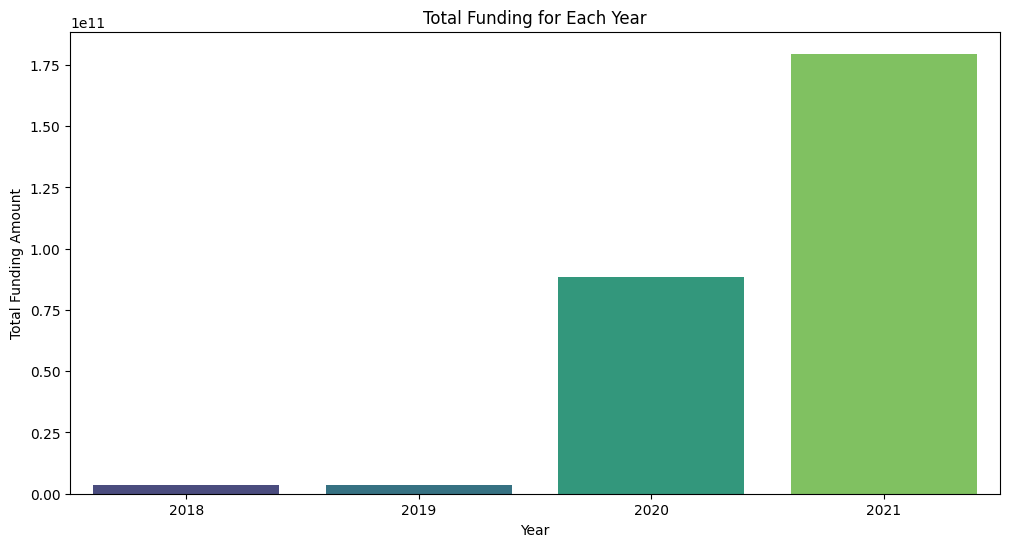

In [368]:

# Group data by year and calculate the total funding amount for each year
year_total_funding = combined_data.groupby('Year')['Amount'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Amount', data=year_total_funding, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding for Each Year')
plt.show()


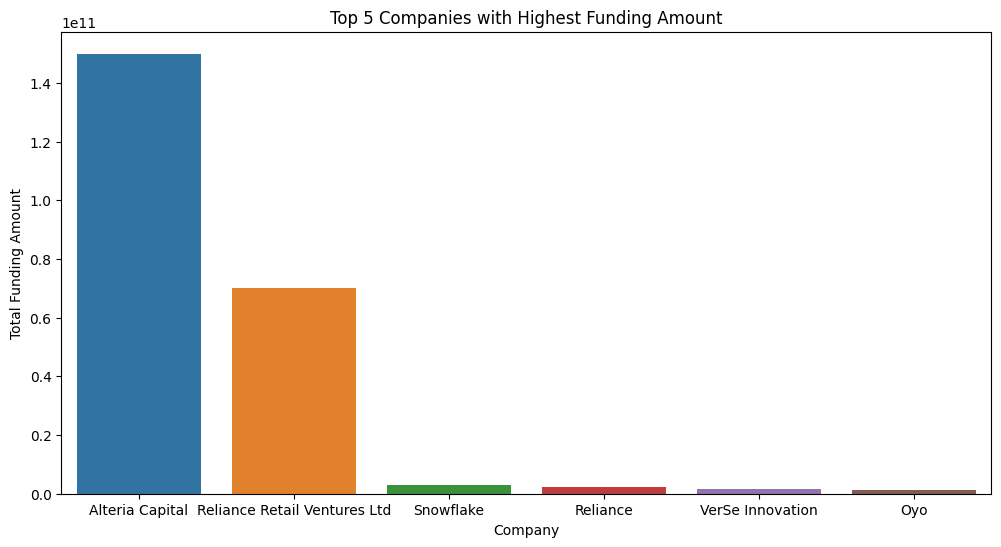

In [372]:


# Group data by company and calculate the total funding amount for each company
company_total_funding = combined_data.groupby('Company/Brand')['Amount'].sum().reset_index()

# Sort companies by the total funding amount in descending order
top_5_companies = company_total_funding.nlargest(6, 'Amount')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Company/Brand', y='Amount', data=top_5_companies)
#plt.xticks(rotation=45)
plt.xlabel('Company')
plt.ylabel('Total Funding Amount')
plt.title('Top 6 Companies with Highest Funding Amount')
plt.show()


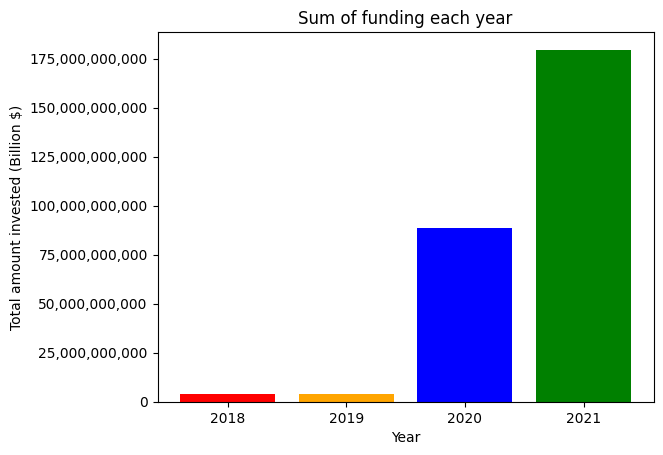

<Figure size 1200x1000 with 0 Axes>

In [363]:
# Create a barplot
plt.bar(year['Year'], year['Amount'], color=['red', 'orange', 'blue', 'green'])

# Set the labels
plt.xlabel('Year')
plt.ylabel('Total amount invested (Billion $)')

# Format the y-axis with commas
def commas(x, pos):
    return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))

# Add a title
plt.title('Sum of funding each year')

# Set the figure size
plt.figure(figsize=(12, 10))

# Show the plot
plt.show()

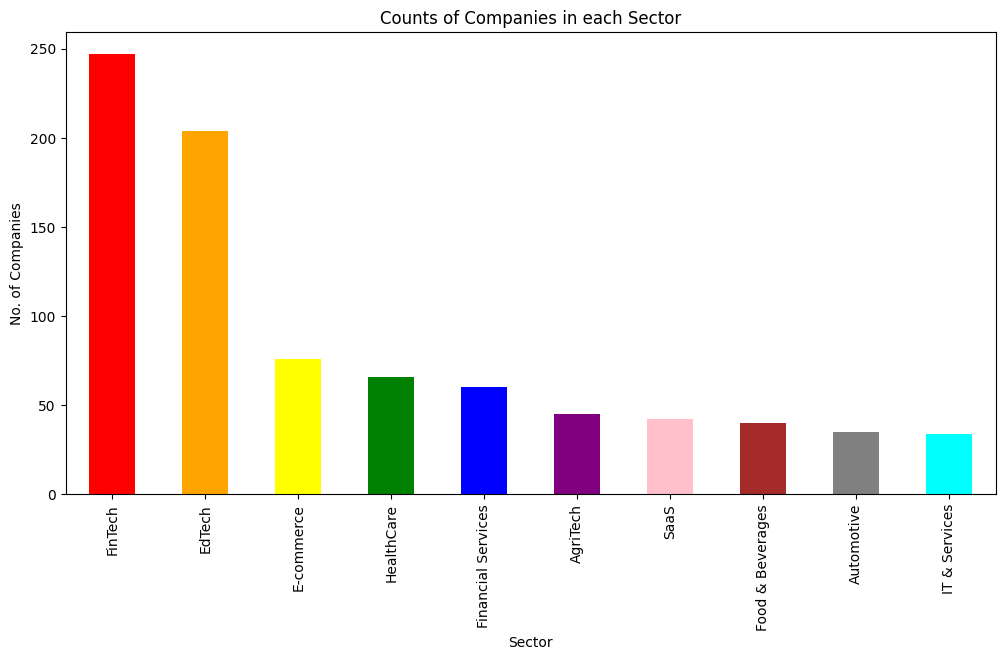

In [347]:
# Get the top 10 sectors
top_10_sectors = combined_data['Sector'].value_counts().head(10)

# Create a list of colors
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan']

# Plot the top 10 sectors
plt.figure(figsize=(12, 6))
top_10_sectors.plot(kind='bar', color=colors)
plt.xticks(rotation=90)
plt.title('Counts of Companies in each Sector')
plt.xlabel('Sector')
plt.ylabel('No. of Companies')
plt.show()

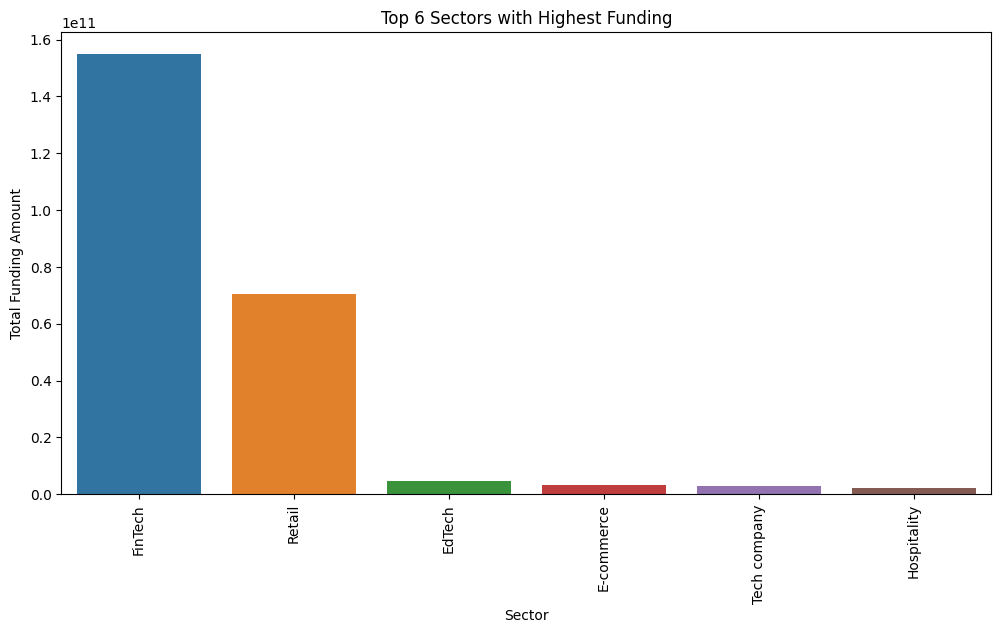

In [348]:
# Group data by sector and calculate the total funding amount for each sector
sector_funding = combined_data.groupby('Sector')['Amount'].sum().reset_index()

# Sort sectors by total funding amount in descending order
top_6_sectors = sector_funding.nlargest(6, 'Amount')

plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='Amount', data=top_6_sectors)
plt.xticks(rotation=90)
plt.title('Top 6 Sectors with Highest Funding')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount')
plt.show()


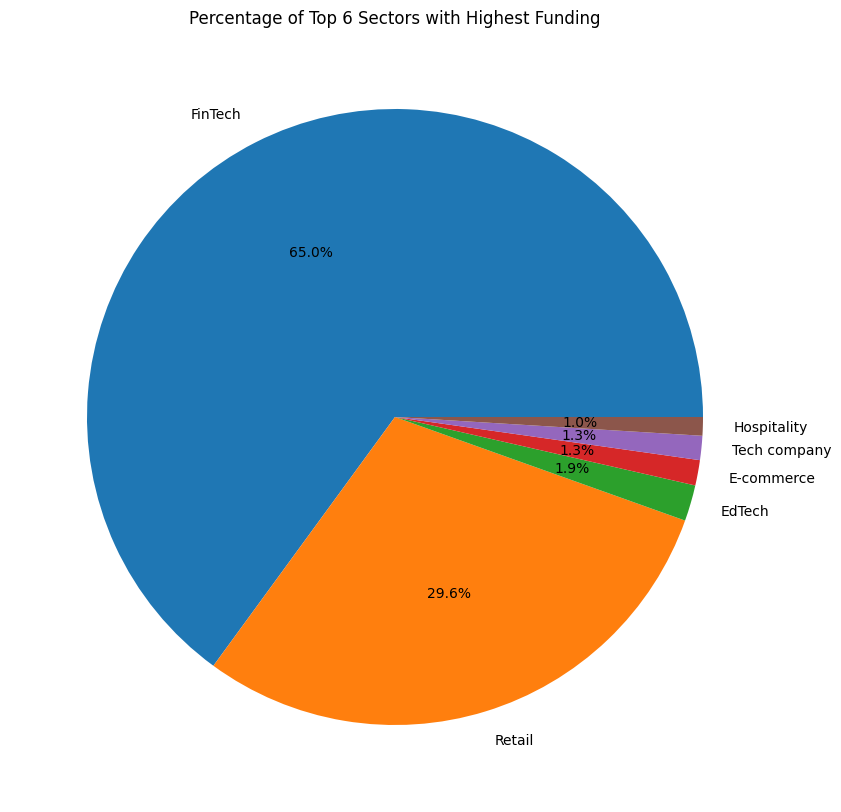

In [349]:
# Group data by sector and calculate the total funding amount for each sector
sector_funding = combined_data.groupby('Sector')['Amount'].sum().reset_index()

# Sort sectors by total funding amount in descending order
top_6_sectors = sector_funding.nlargest(6, 'Amount')

# Create a pie chart
plt.figure(figsize=(12, 10))
plt.pie(top_6_sectors['Amount'], labels=top_6_sectors['Sector'], autopct='%1.1f%%')
plt.title('Percentage of Top 6 Sectors with Highest Funding')
plt.show()

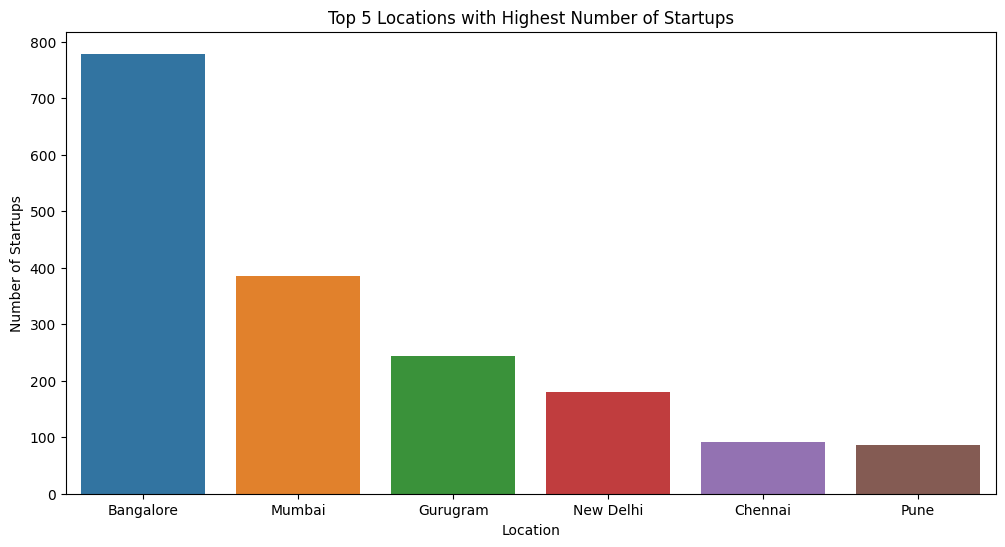

In [350]:
# Group data by location and count the number of startups
location_counts = combined_data.groupby('Location')['Company/Brand'].count().reset_index()

# Sort locations by the number of startups in descending order
top_5_locations = location_counts.nlargest(6, 'Company/Brand')

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Company/Brand', data=top_5_locations)
#plt.xticks(rotation=90)
plt.title('Top 5 Locations with Highest Number of Startups')
plt.xlabel('Location')
plt.ylabel('Number of Startups')
plt.show()

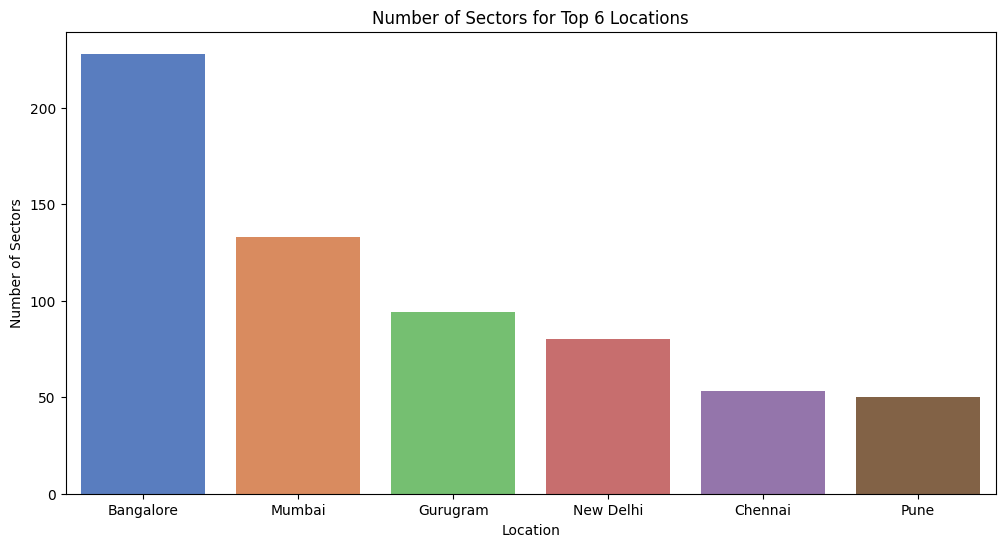

In [351]:
# Group data by location and count the number of unique sectors for each location
location_sector_counts = combined_data.groupby('Location')['Sector'].nunique().reset_index()

# Sort locations by the number of unique sectors in descending order
top_6_locations = location_sector_counts.nlargest(6, 'Sector')

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Sector', data=top_6_locations, palette='muted')
plt.title('Number of Sectors for Top 6 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Sectors')
plt.show()


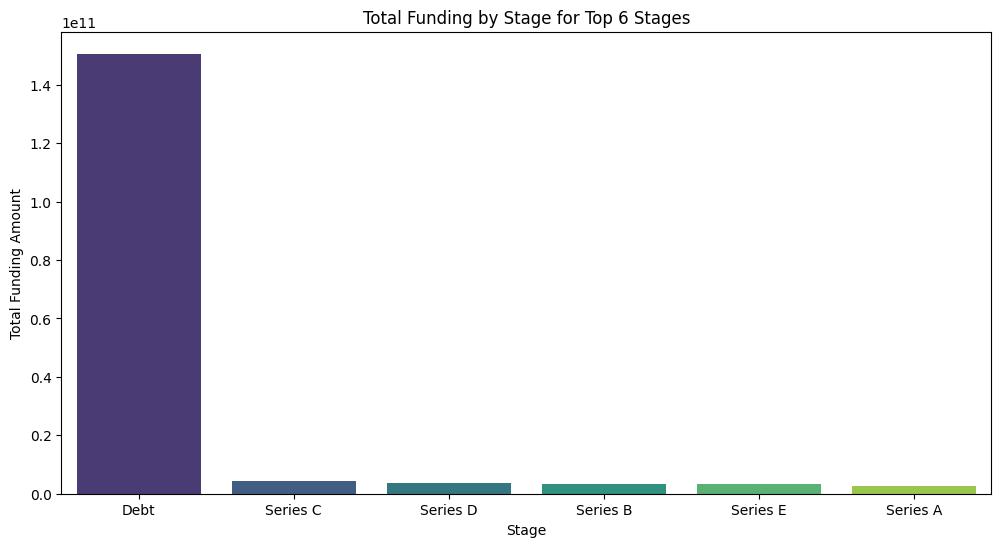

In [352]:
# Group data by stage and calculate the total funding amount for each stage
stage_funding = combined_data.groupby('Stage')['Amount'].sum().reset_index()

# Sort stages by the total funding amount in descending order
top_6_stages = stage_funding.nlargest(6, 'Amount')

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Stage', y='Amount', data=top_6_stages, palette='viridis')
plt.title('Total Funding by Stage for Top 6 Stages')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.show()


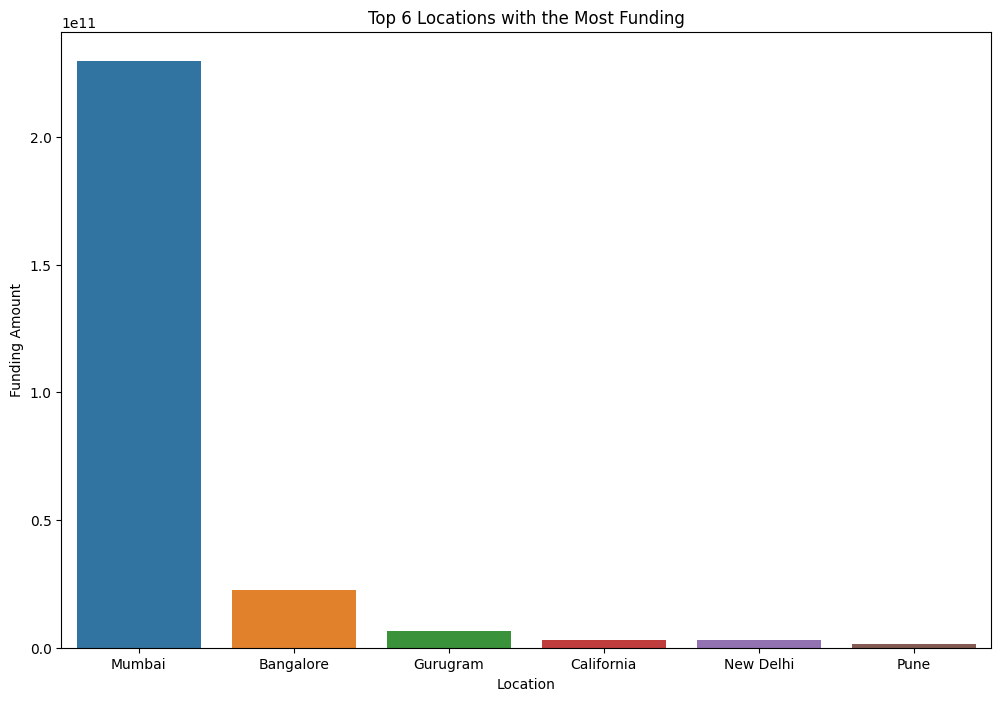

In [353]:
# Group data by location and sum the funding amounts for each location
location_funding = combined_data.groupby('Location')['Amount'].sum().reset_index()

# Sort locations by the funding amount in descending order
top_6_locations = location_funding.nlargest(6, 'Amount')

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='Amount', data=top_6_locations)
#plt.xticks(rotation=90)
plt.title('Top 6 Locations with the Most Funding')
plt.xlabel('Location')
plt.ylabel('Funding Amount')
plt.show()

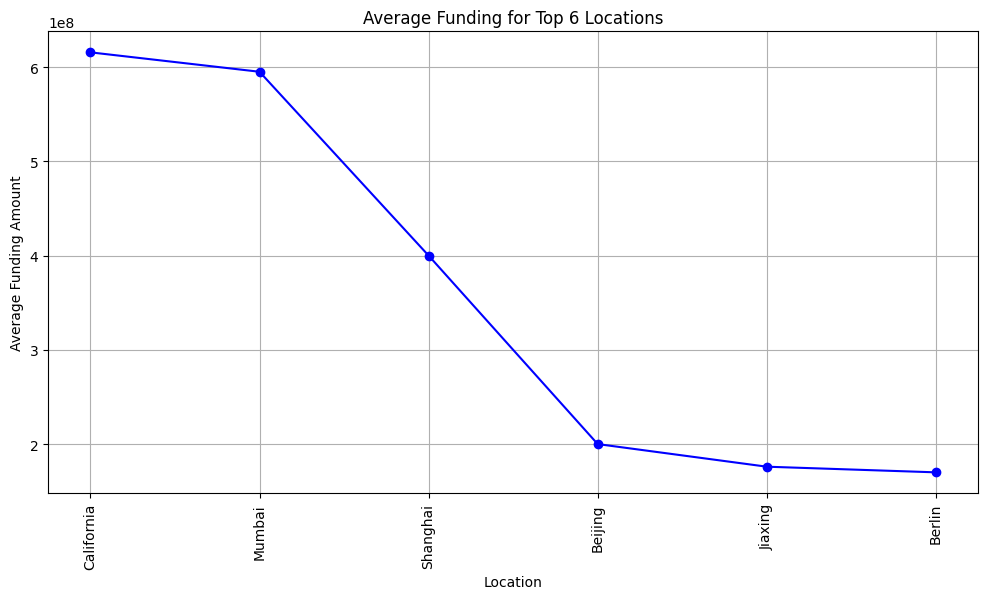

In [354]:
# Group data by location and calculate the average funding amount for each location
location_average_funding = combined_data.groupby('Location')['Amount'].mean().reset_index()

# Sort locations by the average funding amount in descending order
top_6_locations = location_average_funding.nlargest(6, 'Amount')

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(top_6_locations['Location'], top_6_locations['Amount'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Average Funding for Top 6 Locations')
plt.xlabel('Location')
plt.ylabel('Average Funding Amount')
plt.grid(True)
plt.show()


### Which Sector has the Highest Investments 

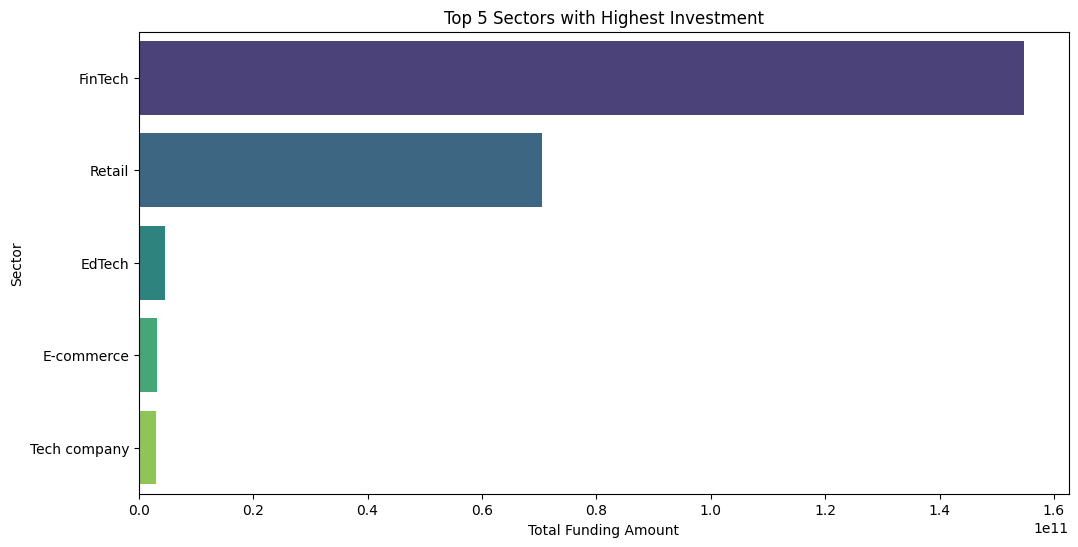

In [355]:
# Group data by sector and calculate the total funding amount for each sector
sector_total_funding = combined_data.groupby('Sector')['Amount'].sum().reset_index()

# Sort sectors by the total funding amount in descending order
highest_sectors = sector_total_funding.nlargest(5, 'Amount')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Sector', data=highest_sectors, palette='viridis')
plt.xlabel('Total Funding Amount')
plt.ylabel('Sector')
plt.title('Top 5 Sectors with Highest Investment')
plt.show()

In [356]:
#finding Lowest sectors

# Group data by sector and calculate the total funding amount for each sector
sector_total_funding = combined_data.groupby('Sector')['Amount'].sum().reset_index()

# Sort sectors by the total funding amount in ascending order
lowest_sectors = sector_total_funding.nsmallest(5, 'Amount')

print(lowest_sectors)



                Sector  Amount
2   AI & Deep learning     0.0
7           AI Startup     0.0
15               AR/VR     0.0
20       Advisory firm     0.0
22        Aero company     0.0


In [358]:
##saving the data file

#Project_LP1 = 'Cleaned_Startup_Data2.csv'  
#combined_data.to_csv(Project_LP1, index=False)